In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

### Loading the datasets ###
CPI_DATASET = 'data/cpi.csv'
EXR_DATASET = 'data/exchange_rate.csv'

cpi = pd.read_csv(CPI_DATASET, header=0).dropna()
exr = pd.read_csv(EXR_DATASET, header=0).dropna()

### Get a description of each dataset ###
print(cpi.columns)
print(exr.columns)

Index(['half_year', 'level_1', 'value'], dtype='object')
Index(['date', 'value'], dtype='object')


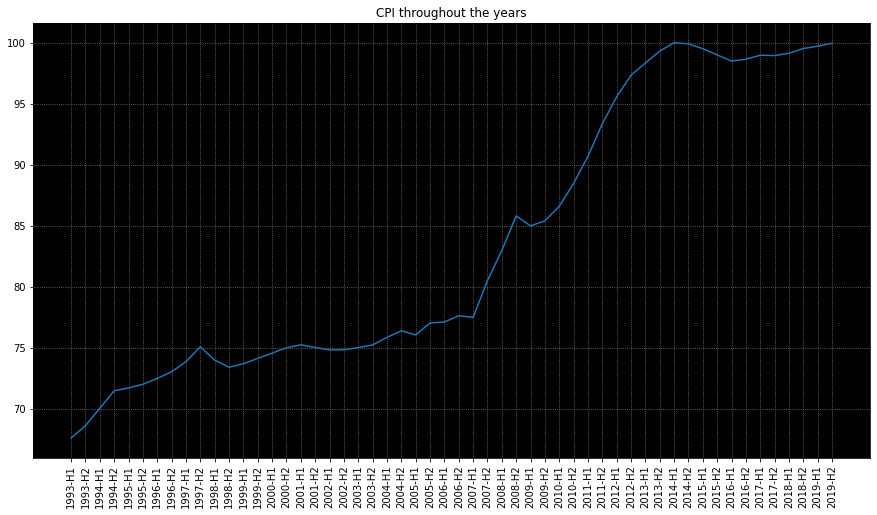

In [7]:
### Plot the cpi by halves year ###
cpi_by_half_year = cpi.groupby('half_year').mean()
cpi_by_half_year = cpi_by_half_year.rename(columns={'value' : 'cpi'})

fig, ax = plt.subplots(figsize=(15,8))
ax.grid(color='gray', linestyle='dotted')
ax.set_facecolor('black')
ax.plot(cpi_by_half_year['cpi'], linestyle='solid')

plt.title('CPI throughout the years')
plt.xticks(rotation=90)
plt.show()

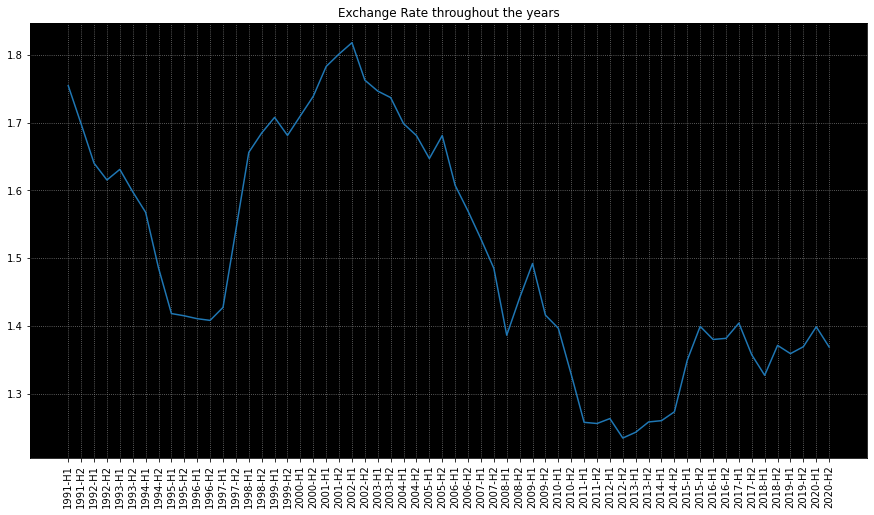

In [8]:
### Map exchange rate by month ###
### Then plot the exchange rate from 1991 to 2020 ###
def map_to_half(date_str):
    splits = date_str.split('/')
    year = int(splits[2])
    month = int(splits[1])
    half = 'H1'
    
    if(month > 6):
        half = 'H2'
    
    if(year < 21):
        year = '20' + '{:02d}'.format(year)
    else:
        year = '19' + '{:02d}'.format(year)
        
    return year + '-' + half

month_str = exr['date'].apply(map_to_half)
exr['date'] = month_str
exr_by_half = exr.rename(columns={'date':'half_year'})
exr_by_half = exr_by_half.rename(columns={'value' : 'ex_rate'})
exr_by_half = exr_by_half.groupby('half_year').mean()

fig, ax = plt.subplots(figsize=(15,8))
ax.set_facecolor('black')
ax.grid(color='gray', linestyle='dotted')
ax.plot(exr_by_half['ex_rate'])

plt.title('Exchange Rate throughout the years')
plt.xticks(rotation=90)
plt.show()

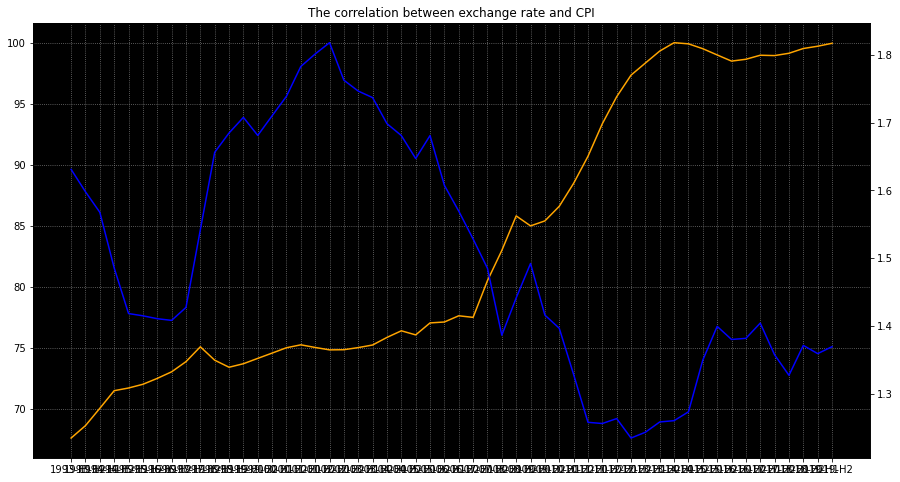

In [9]:
### Now join two dataset together ###
merged = pd.merge(cpi_by_half_year, exr_by_half, on='half_year')

### And plot the two dataset on one axis ###
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(merged['cpi'], color='orange')
ax2 = ax.twinx()
ax2.plot(merged['ex_rate'], color='blue')
ax.set_facecolor('black')
ax.grid(color='gray', linestyle='dotted')

plt.title('The correlation between exchange rate and CPI')
plt.xticks(rotation=90)
plt.show()

In [10]:
### From this dataset, we want to work out the inflation rate as well ###
cpi_values = merged['cpi'].values

def inflation(cpi_1, cpi_2):
    return ((cpi_2 - cpi_1)/cpi_1) * 100

def get_inflation_from_cpi(cpi_vals):
    inflations = []
    for i in range(cpi_vals.shape[0]):
        if(i != cpi_vals.shape[0] - 1):
            inflations.append(inflation(cpi_vals[i], cpi_vals[i+1]))
    
    inflations.append(np.nan)
    return np.array(inflations)

merged['inflation'] = get_inflation_from_cpi(cpi_values)

In [11]:

merged.dropna().corr() ### Get the correlation matrix ###


,cpi,ex_rate,inflation
cpi,1.000000,-0.754991,-0.088160
ex_rate,-0.754991,1.000000,-0.236767
inflation,-0.088160,-0.236767,1.000000


In [12]:
merged.to_csv('data/cpi_and_exchange_rate.csv')


In [13]:
merged


,cpi,ex_rate,inflation
half_year,,,
1993-H1,67.631667,1.630887,1.505212
1993-H2,68.649667,1.597829,2.068473
1994-H1,70.069667,1.567529,2.057952
1994-H2,71.511667,1.485443,0.308108
1995-H1,71.732000,1.418135,0.424729
1995-H2,72.036667,1.414817,0.670955
1996-H1,72.520000,1.410565,0.743243
1996-H2,73.059000,1.408057,1.138806
1997-H1,73.891000,1.427177,1.649276
